<a href="https://colab.research.google.com/github/ritaprova/66-days-of-data/blob/main/30_12_Day_2_Learning_curves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Learning curves are one of the best ways to identify if a model is underfitting or over fitting the data 

Text(0.5, 1.0, 'Data')

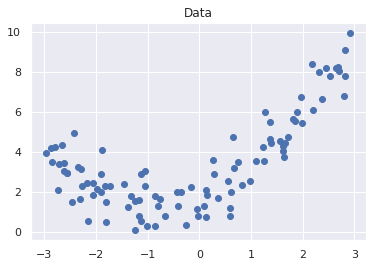

In [9]:
#creating the data
#in this case we will create data from a polynomial function and see how a linear model underfits it 
import numpy as np 
import pandas as pd 
np.random.seed(42)
X = 6*np.random.rand(100,1)-3
y = 0.5*X**2 + X + 2 + np.random.randn(100,1)

import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.title("Data")

* note: It must be noted that the analysis of under or overfitting the data can be done by cross validation curves too 

In [31]:
#function for learning curves 
# we will be using mean squared error as a metric and then taking the root
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def learning_curves(regressor,X,y):
  x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
  train_errors, test_errors = [],[]
  # run a loop for sizes of training data 
  for size in range(1,len(x_train)):
    regressor.fit(x_train[:size],y_train[:size]) #fit the data till that set
    y_train_pred = regressor.predict(x_train[:size])
    train_errors.append(mean_squared_error(y_train[:size],y_train_pred))
    y_test_pred = regressor.predict(x_test)
    test_errors.append(mean_squared_error(y_test,y_test_pred))
  #plotting the sq root of the 2 errors 
  plt.figure(figsize=(10,5))
  plt.plot(np.sqrt(train_errors), "r-", linewidth=2, label="train")
  plt.plot(np.sqrt(test_errors), "b-", linewidth=2, label="test")

(-3.0, 5.0)

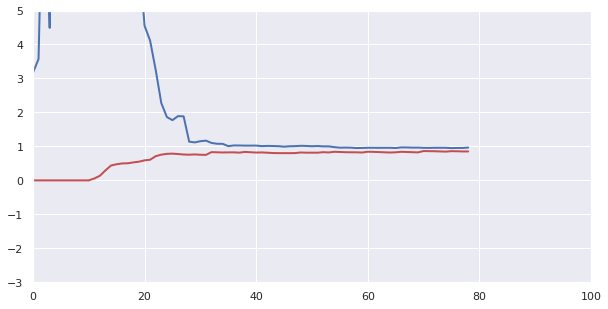

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
polynomial_regression = Pipeline([
                                  ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                                  ("lin_reg", LinearRegression()),
                                  ])
lin_reg = LinearRegression()
learning_curves(polynomial_regression, X, y)
plt.xlim(0,100)
plt.ylim(-3,5)

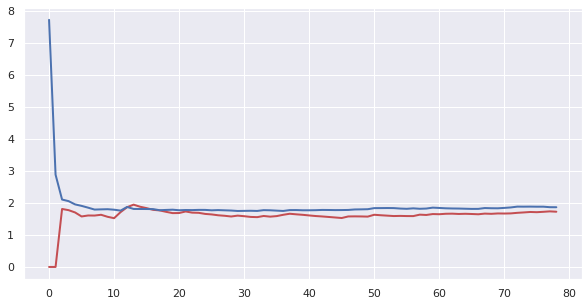

In [40]:
learning_curves(lin_reg, X, y)